In [1]:
import numpy as np
from utils import plot_values
from frozenlake import FrozenLakeEnv

In [2]:
# init the environment
env = FrozenLakeEnv(map_name="8x8", is_slippery=True)

In [3]:
# print the state space and action space
# check number of states and actions
nb_states = env.observation_space.n
nb_actions = env.action_space.n

print('State space:', nb_states)
print('Action space:', nb_actions)

State space: 64
Action space: 4


In [4]:
def iterate_value(env, nb_iterations, discount_factor=1.0, threshold=1e-30):
    
    # initialize value table randomly
    value_table = np.zeros((nb_states, 1))

    for i in range(nb_iterations):
        
        new_value_table = np.copy(value_table)
        for state in range(nb_states):
            
            q_value = []
            for action in range(nb_actions):
                
                next_state_reward = []
                for next_state_parameters in env.P[state][action]:
                    
                    transition_prob, next_state, reward_prob, _ = next_state_parameters
                    # apply Bellman equation
                    reward = transition_prob * (reward_prob + discount_factor * new_value_table[next_state])
                    
                    next_state_reward.append(reward)
                    
                q_value.append((np.sum(next_state_reward)))
                
            value_table[state] = max(q_value)
            
        if (np.sum(np.fabs(new_value_table - value_table)) <= threshold): break
            
    return value_table

In [5]:
def extract_policy(value_table, discount_factor=1.0):
    
    # initialize policy randomly
    policy = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            
            for next_state_parameters in env.P[state][action]:
                transition_prob, next_state, reward_prob, _ = next_state_parameters
                # apply Bellman equation
                Q_table[action] += (transition_prob * (reward_prob + discount_factor * value_table[next_state]))
        
        policy[state] = np.argmax(Q_table)
        
    return policy

In [6]:
NB_ITERATIONS = 10000

In [7]:
value_table = iterate_value(env, NB_ITERATIONS)
policy = extract_policy(value_table)

In [8]:
print('Environment Display:')
print(env.render())

Environment Display:

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
None


Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):


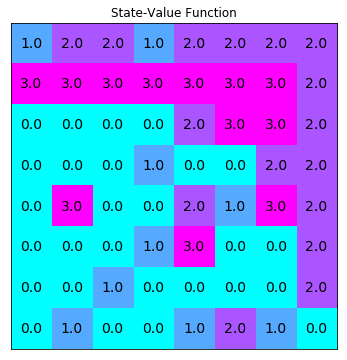

In [9]:
print('Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):')
plot_values(np.reshape(policy, (env.action_space.n, -1)), shape=(8,8))

---